In this homework, we will use the Students Performance in 2024 JAMB dataset from [Kaggle](https://www.kaggle.com/datasets/idowuadamo/students-performance-in-2024-jamb).

Here's a wget-able link:

In [1]:
#!wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv

The goal of this homework is to create a regression model for predicting the performance of students on a standardized test <code>column['JAMB_Score'</code>).

__Preparing the dataset__
First, let's make the names lowercase:

In [2]:
import pandas as pd
df = pd.read_csv("jamb_exam_results.csv")

In [3]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [4]:
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


Preparation:

- Remove the student_id column.
- Fill missing values with zeros.
- Do train/validation/test split with 60%/20%/20% distribution.
- Use the <code>train_test_split<\code> function and set the <code>random_state</code> parameter to 1.
- Use <code>DictVectorizer(sparse=True)<\code> to turn the dataframes into matrices.

In [5]:
df_new = df.copy()

In [6]:
del df_new["student_id"]

df_new = df_new.fillna(0)

from sklearn.model_selection import train_test_split

In [7]:
df_full_train, df_test = train_test_split(df_new, test_size = 0.2, random_state = 1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state =1)



In [8]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop =True)
df_full_train = df_full_train.reset_index(drop= True)

In [9]:
y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values
y_full_train = df_full_train.jamb_score.values

In [10]:
df_train.columns

Index(['jamb_score', 'study_hours_per_week', 'attendance_rate',
       'teacher_quality', 'distance_to_school', 'school_type',
       'school_location', 'extra_tutorials', 'access_to_learning_materials',
       'parent_involvement', 'it_knowledge', 'age', 'gender',
       'socioeconomic_status', 'parent_education_level',
       'assignments_completed'],
      dtype='object')

In [11]:
del df_train["jamb_score"]
del df_val["jamb_score"]
del df_test["jamb_score"]
del df_full_train["jamb_score"]

In [12]:
from sklearn.feature_extraction import DictVectorizer

In [13]:
train_dicts = df_train.to_dict(orient = "records")
val_dicts = df_val.to_dict(orient = "records")
test_dicts = df_test.to_dict(orient = "records")
full_train_dicts = df_full_train.to_dict(orient = "records")


In [14]:
dv = DictVectorizer(sparse = True)
dv.fit(train_dicts)

X_train = dv.transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)
X_full_train = dv.transform(full_train_dicts)

__Question 1__
Let's train a decision tree regressor to predict the jamb_score variable.

Train a model with <code>max_depth=1 <code>.

Which feature is used for splitting the data?

-  <code>study_hours_per_week</code>
- <code>attendance_rate</code>
- <code>teacher_quality</code>
- <code>distance_to_school</code>

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score 


In [16]:
print(y_train)

[145 231 161 ... 216 234 103]


In [17]:
dt = DecisionTreeRegressor(max_depth =1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)

In [18]:
from sklearn.tree import export_text

In [19]:
print(export_text(dt, feature_names = list(dv.get_feature_names_out())))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



__Question 2__

Train a random forest model with these parameters:

<code>n_estimators=10<code>
<code>random_state=1<code>
<code>n_jobs=-1 <code>(optional - to make training faster)

What's the RMSE of this model on validation?

- 22.13
- 42.13
- 62.13
- 82.12

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [21]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 1, n_jobs = -1)

In [22]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_val)

val_rmse = root_mean_squared_error(y_val, y_pred)

In [23]:
print(val_rmse)

42.13724207871227


__Question 3__

Now let's experiment with the <code>n_estimators</code> parameter

Try different values of this parameter from 10 to 200 with step 10.
Set <code>random_state</code> to 1.

Evaluate the model on the validation dataset.
After which value of <code>n_estimators</code> does RMSE stop improving? Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200

In [24]:
rmse_n_est = []
for n_est in range(10,201,10):
    rf = RandomForestRegressor(n_estimators = n_est, random_state = 1, n_jobs =-1)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_val)
    val_n_est = root_mean_squared_error(y_val,y_pred)
    rmse_n_est.append((n_est,val_n_est))

In [25]:
df_n_est = pd.DataFrame(rmse_n_est, columns = ["n_estimators", "RMSE"])

In [26]:
df_n_est.sort_values(by = "RMSE", ascending = False)

,n_estimators,RMSE
0,10,42.137242
1,20,41.461215
2,30,41.106171
3,40,40.917194
4,50,40.852279
5,60,40.784281
6,70,40.677098
12,130,40.650841
17,180,40.641314
18,190,40.631355


__Question 4__

Let's select the best max_depth:

Try different values of <code>max_depth: [10, 15, 20, 25] </code>
For each of these values,
try different values of <code>n_estimators</code> from 10 till 200 (with step 10)
calculate the mean RMSE
Fix the <code>random seed: random_state=1 </code>

What's the best max_depth, using the mean RMSE?

- 10
- 15
- 20
- 25

In [27]:
parameters_list = []
for m_dept in [10, 15, 20, 25]:
    for n_est in range(10,201, 10):
        rf = RandomForestRegressor(n_estimators = n_est, max_depth = m_dept, random_state=  1, n_jobs = -1)
        rf.fit(X_train,y_train)
        y_pred = rf.predict(X_val)
        rmse_m_dept = root_mean_squared_error(y_pred, y_val)
        parameters_list.append((m_dept,n_est,rmse_m_dept))


In [28]:
df_max_depth = pd.DataFrame(parameters_list, columns = ["max_depth","n_estimators","RMSE"])

In [29]:
df_max_depth.sort_values(by=["RMSE"], ascending = False)

,max_depth,n_estimators,RMSE
60,25,10,42.160439
40,20,10,42.024831
20,15,10,42.003979
61,25,20,41.470970
21,15,20,41.455699
...,...,...,...
5,10,60,40.277035
3,10,40,40.270069
9,10,100,40.250490
7,10,80,40.210305


__Question 5__

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parameters:
- <code>n_estimators = 10</code>,
- <code>max_depth = 20</code>,
- <code>random_state = 1</code>,
- <code>n_jobs = -1</code>

Get the feature importance information from this model
What's the most important feature (among these 4)?

- study_hours_per_week
- attendance_rate
- distance_to_school
- teacher_quality

In [30]:
rf_new = RandomForestRegressor(n_estimators = 10, max_depth = 20, random_state = 1, n_jobs = -1)
rf_new.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [31]:

features = list(dv.get_feature_names_out())

In [32]:
import time

import numpy as np


importances = rf_new.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_new.estimators_], axis=0)


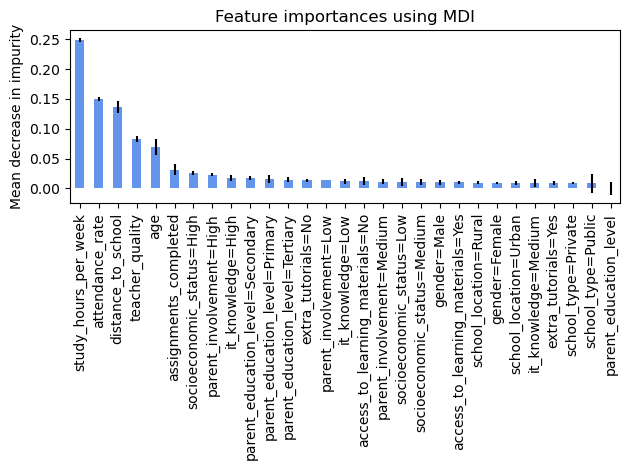

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
forest_importances = pd.Series(importances, index=features).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, color = "cornflowerblue")
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

__Question 6__

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

Install XGBoost

Create DMatrix for train and validation

Create a watchlist

Train a model with these parameters for 100 rounds:


<code>xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}</code>
Now change <code>eta</code> from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?

- 0.3
- 0.1
- Both give equal value

In [34]:
!pip install xgboost

In [35]:
# check xgboost version
import xgboost as xgb
features = list(dv.get_feature_names_out())

df_train = xgb.DMatrix(X_train, label = y_train, feature_names = features)
df_val = xgb.DMatrix(X_val,label = y_val, feature_names = features)

In [36]:
watchlist = [(df_train, 'train'), (df_val, 'val')]

In [37]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [38]:
%%capture output

model1 = xgb.train(xgb_params, df_train, num_boost_round=100, evals=watchlist)

In [39]:
s = output.stdout

In [40]:
s

'[0]\ttrain-rmse:42.69384\tval-rmse:44.89114\n[1]\ttrain-rmse:39.83326\tval-rmse:43.07010\n[2]\ttrain-rmse:37.94542\tval-rmse:42.00332\n[3]\ttrain-rmse:36.56125\tval-rmse:41.46452\n[4]\ttrain-rmse:35.44252\tval-rmse:40.88896\n[5]\ttrain-rmse:34.57756\tval-rmse:40.69096\n[6]\ttrain-rmse:33.84230\tval-rmse:40.59315\n[7]\ttrain-rmse:33.25929\tval-rmse:40.47993\n[8]\ttrain-rmse:32.79415\tval-rmse:40.45326\n[9]\ttrain-rmse:32.16019\tval-rmse:40.43929\n[10]\ttrain-rmse:31.63404\tval-rmse:40.48319\n[11]\ttrain-rmse:31.17673\tval-rmse:40.68201\n[12]\ttrain-rmse:30.87313\tval-rmse:40.63522\n[13]\ttrain-rmse:30.30310\tval-rmse:40.70983\n[14]\ttrain-rmse:30.00098\tval-rmse:40.78133\n[15]\ttrain-rmse:29.41497\tval-rmse:40.86107\n[16]\ttrain-rmse:29.25816\tval-rmse:40.96580\n[17]\ttrain-rmse:28.59378\tval-rmse:41.12190\n[18]\ttrain-rmse:28.27990\tval-rmse:41.14360\n[19]\ttrain-rmse:27.94572\tval-rmse:41.22835\n[20]\ttrain-rmse:27.49658\tval-rmse:41.27921\n[21]\ttrain-rmse:27.25449\tval-rmse:41.3242

In [41]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [42]:
%%capture output

model2 = xgb.train(xgb_params, df_train, num_boost_round=100, evals=watchlist)

In [43]:
f = output.stdout

In [44]:
f

'[0]\ttrain-rmse:45.49999\tval-rmse:47.00533\n[1]\ttrain-rmse:44.12948\tval-rmse:45.92344\n[2]\ttrain-rmse:42.94858\tval-rmse:44.98366\n[3]\ttrain-rmse:41.90896\tval-rmse:44.25755\n[4]\ttrain-rmse:40.96728\tval-rmse:43.57339\n[5]\ttrain-rmse:40.17514\tval-rmse:43.11181\n[6]\ttrain-rmse:39.40436\tval-rmse:42.61054\n[7]\ttrain-rmse:38.71199\tval-rmse:42.18883\n[8]\ttrain-rmse:38.08081\tval-rmse:41.86754\n[9]\ttrain-rmse:37.57559\tval-rmse:41.64338\n[10]\ttrain-rmse:37.07490\tval-rmse:41.39235\n[11]\ttrain-rmse:36.58709\tval-rmse:41.14265\n[12]\ttrain-rmse:36.14574\tval-rmse:40.95201\n[13]\ttrain-rmse:35.76896\tval-rmse:40.81778\n[14]\ttrain-rmse:35.40802\tval-rmse:40.75008\n[15]\ttrain-rmse:35.08521\tval-rmse:40.61341\n[16]\ttrain-rmse:34.74187\tval-rmse:40.51800\n[17]\ttrain-rmse:34.43969\tval-rmse:40.41659\n[18]\ttrain-rmse:34.16132\tval-rmse:40.33546\n[19]\ttrain-rmse:33.91836\tval-rmse:40.25632\n[20]\ttrain-rmse:33.67389\tval-rmse:40.25010\n[21]\ttrain-rmse:33.45853\tval-rmse:40.1982

In [47]:
y_pred1 = model1.predict(df_val)
y_pred2 = model2.predict(df_val)

rmse_m1 = root_mean_squared_error(y_pred1,y_val)
rmse_m2 = root_mean_squared_error(y_pred2,y_val)

In [48]:
rmse_m1

43.418817345871766

In [49]:
rmse_m2

41.05034017683498

__eta 0.1 gave better result__